In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np

Using TensorFlow backend.


In [2]:
batch_size = 64
num_classes = 10
epochs = 12
# 入力画像データのサイズ
img_rows, img_cols = 28, 28

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# バックで動くライブラリの画像のフォーマットがチャンネルが最初に来るならtrue来ないならelseへ
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# 画素をfloat型に変換し，０～１に収めるために255で割る
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# 教師データをワンホットに変換
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

In [8]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s - loss: 0.3314 - acc: 0.8979 - val_loss: 0.0826 - val_acc: 0.9731
Epoch 2/12
60000/60000 [==============================] - 5s - loss: 0.1331 - acc: 0.9602 - val_loss: 0.0616 - val_acc: 0.9804
Epoch 3/12
60000/60000 [==============================] - 5s - loss: 0.1048 - acc: 0.9693 - val_loss: 0.0471 - val_acc: 0.9851
Epoch 4/12
60000/60000 [==============================] - 5s - loss: 0.0864 - acc: 0.9742 - val_loss: 0.0420 - val_acc: 0.9865
Epoch 5/12
60000/60000 [==============================] - 5s - loss: 0.0779 - acc: 0.9771 - val_loss: 0.0396 - val_acc: 0.9868
Epoch 6/12
60000/60000 [==============================] - 6s - loss: 0.0684 - acc: 0.9798 - val_loss: 0.0348 - val_acc: 0.9883
Epoch 7/12
60000/60000 [==============================] - 5s - loss: 0.0643 - acc: 0.9807 - val_loss: 0.0333 - val_acc: 0.9882
Epoch 8/12
60000/60000 [==============================] - 6s 

In [6]:
model.save("data/mnist_keras_CNN.h5")

In [7]:
#参考　https://github.com/enakai00/jupyter_tfbook/blob/master/Chapter05/Handwriting%20recognizer.ipynb
    
input_form = """
<table>
<td style="border-style: none;">
<div style="border: solid 2px #666; width: 143px; height: 144px;">
<canvas width="140" height="140"></canvas>
</div></td>
<td style="border-style: none;">
<button onclick="clear_value()">Clear</button>
</td>
</table>
"""

javascript = """
<script type="text/Javascript">
    var pixels = [];
    for (var i = 0; i < 28*28; i++) pixels[i] = 0
    var click = 0;

    var canvas = document.querySelector("canvas");
    canvas.addEventListener("mousemove", function(e){
        if (e.buttons == 1) {
            click = 1;
            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";
            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);
            x = Math.floor(e.offsetY * 0.2)
            y = Math.floor(e.offsetX * 0.2) + 1
            for (var dy = 0; dy < 2; dy++){
                for (var dx = 0; dx < 2; dx++){
                    if ((x + dx < 28) && (y + dy < 28)){
                        pixels[(y+dy)+(x+dx)*28] = 1
                    }
                }
            }
        } else {
            if (click == 1) set_value()
            click = 0;
        }
    });
    
    function set_value(){
        var result = ""
        for (var i = 0; i < 28*28; i++) result += pixels[i] + ","
        var kernel = IPython.notebook.kernel;
        kernel.execute("image = [" + result + "]");
    }
    
    function clear_value(){
        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";
        canvas.getContext("2d").fillRect(0, 0, 140, 140);
        for (var i = 0; i < 28*28; i++) pixels[i] = 0
    }
</script>
"""

In [31]:
from IPython.display import HTML
HTML(input_form + javascript)

In [24]:
import numpy as np
from keras.models import load_model
model=load_model("data/mnist_keras_CNN.h5")

In [25]:
image=np.array(image)
image=image.reshape(1,img_rows, img_cols,1)

In [26]:
predict=model.predict(image)
print(predict)
np.argmax(predict)

[[  4.07372081e-10   3.85128290e-10   7.76574005e-09   1.71025594e-09
    4.19361168e-09   5.00112129e-09   9.40006753e-11   5.26978572e-10
    9.99999881e-01   8.35614244e-08]]


8

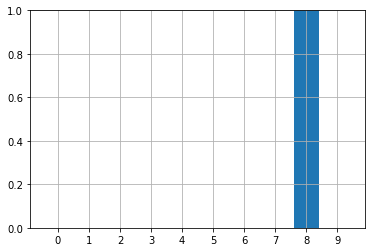

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

list=predict.tolist()
list=[flatten for inner in list for flatten in inner]
label=[0,1,2,3,4,5,6,7,8,9]
plt.bar(range(10),list,tick_label=label, align="center")
plt.ylim(0.0,1.0)
plt.grid(True)
plt.show()